# Multiple linear regression (MLR)
We are choosing MLR, as the dataset contains multiple input features and five continuous target features

As we have to predict five continuous values, we have to apply MLR five time.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 999

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
import os

In [2]:
# load the dataset 
os.chdir('C:\\Users\\伯乐大典\\Desktop\\Master_thesis\\Data\\Ergebnisse\\DataFrame_with_5_quality_value\\Sorted_DataFrame')
df_APEC_total=pd.read_excel('./df_APEC_total.xlsx')
df_PLEXIGLAS_total=pd.read_excel('./df_PLEXIGLAS_total.xlsx')
df_SABIC_total=pd.read_excel('./df_SABIC_total.xlsx')
df_ULTEM_total=pd.read_excel('./df_ULTEM_total.xlsx')
df_ULTRAMID_total=pd.read_excel('./df_ULTRAMID_total.xlsx')
df_VALOX_total=pd.read_excel('./df_VALOX_total.xlsx')
df = pd.concat([df_APEC_total, df_PLEXIGLAS_total, df_SABIC_total, df_ULTEM_total, df_ULTRAMID_total, df_VALOX_total])

In [3]:
df = df.drop(['CTE constant //','E0 - E Polynom //', 'E1 - E Polynom //','E2 - E Polynom //', 'E3 - E Polynom //','Load  (MFR/MFI)',
'Maximum Melt Temp','Melt Volume Rate  (MVR)','Melt Volume Rate  (MVR)','Minimum Melt Temp','Pm1', 'Pm2', 'Pm3', 'Pm4',
'Ps2','Ps3', 'Ps4', 'Ps5', 'Ps6', 'Ps7','Pt1', 'Pt2','T0','Temperature  (MVR)','Temperature  (MFR/MFI)',
'Minimum Mold Temp','Ps1','Suggested Mold Temp','Suggested Melt Temp'], axis=1)
df.head()

,Part weight,Length,Angle,Height,Width,Melt temperature,Cavity wall temperature,Holding pressure time,Cooling time,Injection flow rate,Holding pressure,Maximum Mold Temp,No Flow Temp,Ejection Temp,Specific Heat (Cp) - Constant,Thermal Conductivity (Lambda) - Constant,Thermal diffusivity [K=lambda/(rho*Cp)],Solid density,Melt density,Load (MVR),Melt Volume Rate (MFR/MFI),P1,P2,P3,Ts,E Constant //,N0 - Nu Polynom //
0,61.655,89.231673,89.586073,60.264619,59.029274,320.0,100.0,10.05,20.0,30.99564,50.0,120.0,182.0,142.0,1700.0,0.171,0.0996,1180.0,1010.0,2.16,25.25,878573.0,0.002058,0.705504,170162.0,2300.0,0.35
1,61.493,89.211665,89.524614,60.246695,58.969269,340.0,100.0,10.05,20.0,30.99564,50.0,120.0,182.0,142.0,1700.0,0.171,0.0996,1180.0,1010.0,2.16,25.25,878573.0,0.002058,0.705504,170162.0,2300.0,0.35
2,61.581,89.207231,89.566971,60.247279,58.999199,320.0,120.0,10.05,20.0,30.99564,50.0,120.0,182.0,142.0,1700.0,0.171,0.0996,1180.0,1010.0,2.16,25.25,878573.0,0.002058,0.705504,170162.0,2300.0,0.35
3,61.572,89.233164,89.549956,60.261453,59.000478,340.0,120.0,10.05,20.0,30.99564,50.0,120.0,182.0,142.0,1700.0,0.171,0.0996,1180.0,1010.0,2.16,25.25,878573.0,0.002058,0.705504,170162.0,2300.0,0.35
4,61.577,89.223508,89.555748,60.256577,59.000509,320.0,100.0,19.95,20.0,30.99564,50.0,120.0,182.0,142.0,1700.0,0.171,0.0996,1180.0,1010.0,2.16,25.25,878573.0,0.002058,0.705504,170162.0,2300.0,0.35


In [1]:
df.shape

NameError: name 'df' is not defined

In [4]:
# seperating the input features and target features
X = df.iloc[:, 5:27].fillna(0)
y1 = df.iloc[:, 0] # This corresponds to Part weight
y2 = df.iloc[:, 1] # Thsi corresponds to Length
y3 = df.iloc[:, 2] # This corresponds to Angle
y4 = df.iloc[:, 3] # Thsi corresponds to Height
y5 = df.iloc[:, 4] # This corresponds to Width

In [5]:
X.columns

Index(['Melt temperature', 'Cavity wall temperature', 'Holding pressure time',
       'Cooling time', 'Injection flow rate', 'Holding pressure',
       'Maximum Mold Temp', 'No Flow Temp', 'Ejection Temp',
       'Specific Heat (Cp) - Constant',
       'Thermal Conductivity (Lambda) - Constant',
       'Thermal diffusivity [K=lambda/(rho*Cp)] ', 'Solid density',
       'Melt density', 'Load  (MVR)', 'Melt Volume Rate  (MFR/MFI)', 'P1',
       'P2', 'P3', 'Ts', 'E Constant //', 'N0 - Nu Polynom //'],
      dtype='object')

In [6]:
import numpy as np
from math import sqrt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score # for assessing the model
from sklearn.model_selection import train_test_split # for dividing the dataset into train and test set
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest 
from sklearn.preprocessing import StandardScaler # for standardizing the features

import seaborn as sn # for heatmap
import matplotlib.pyplot as plt # for ploting the results

%matplotlib inline

# Function for MLR
# inputs: statistic used for feature seletion, X, and target feature
def multiple_linear_regression(statistic, X, y, target_label):
    
    if(statistic == f_regression):
        scoring_fn = 'f_regression'
#         y_lim = 0.7
    else:
        scoring_fn = 'mutual_info_regression'
#         y_lim = 0.3
    
    # storing the rmse and r2 score for each subset of features in forward selection of the the features
    y_rmse = []
    y_r2_score = []

    for i in range(1,23):
        
        # selecting the i best features using the below function
        test = SelectKBest(score_func = statistic, k=i).fit(X, y)
        X_new = test.transform(X)

        # Standardazing the features selected by above method to 0 mean and unit variance
        scaler = StandardScaler()
        X_std = scaler.fit_transform(X_new)
        
        # Split the data into training/testing sets
        X_train, X_test, y_train, y_test = train_test_split(
                X_std, y, test_size = 0.33, random_state = 1) # test size = 33%
        
        # Creating the MLR
        mlr = linear_model.LinearRegression()
        
        # Train the model using the training sets
        mlr.fit(X_train, y_train)
    
        # Make predictions using the testing set
        y_pred = mlr.predict(X_test)
    
        # calculating the rmse and storing it in the rmse list to plot later
        # to select best subset of fatures)
        y_rmse.append(sqrt(mean_squared_error(y_test, y_pred)))
        
        # calculating the R2(Coef. of determination) and storing it in the list to plot later 
        # to select best subset of fatures)
        y_r2_score.append(r2_score(y_test, y_pred))
    
    k = np.arange(1,23)
    plt.figure()
    plt.grid(True)
    plt.title('MLR for {} ({})'.format(target_label, scoring_fn))
    plt.xlabel('Number of features')
    plt.ylabel('Root mean squared error')
    plt.xlim(0, 23)
    plt.plot(k, y_rmse, lw = 2, marker = 'o', markersize = 7)

    plt.figure()
    plt.grid(True)
    plt.title('MLR for {} ({})'.format(target_label, scoring_fn))
    plt.xlabel('Number of features')
    plt.ylabel('Coefficient of determination R2')
    plt.xlim(0,23)
    #plt.ylim(y_lim, 1)
    plt.plot(k, y_r2_score, lw = 2, marker = 'o', markersize = 7)

In [9]:
y1 = np.ravel(y1)
y2 = np.ravel(y2)
y3 = np.ravel(y3)
y4 = np.ravel(y4)
y5 = np.ravel(y5)

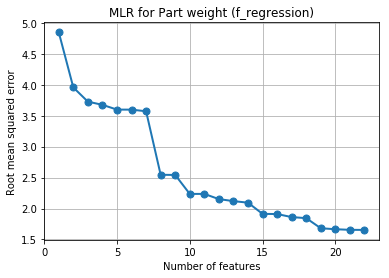

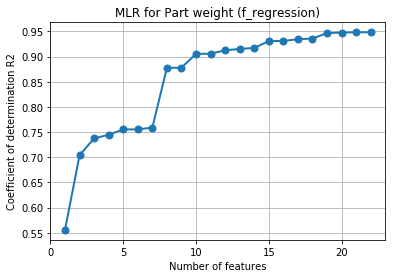

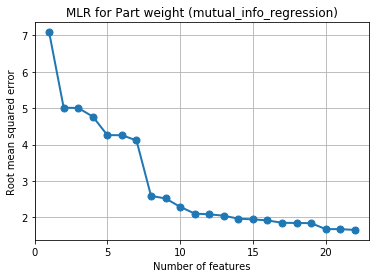

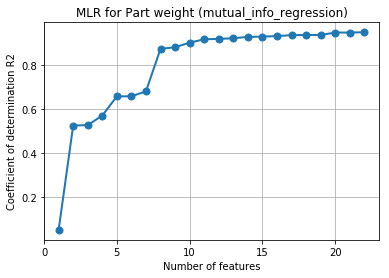

In [10]:
multiple_linear_regression(f_regression, X, y1, 'Part weight')
multiple_linear_regression(mutual_info_regression, X, y1, 'Part weight')

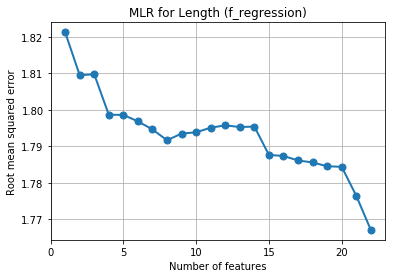

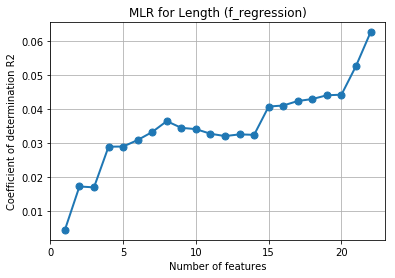

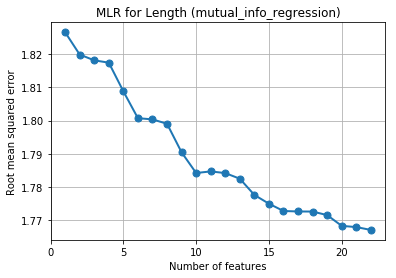

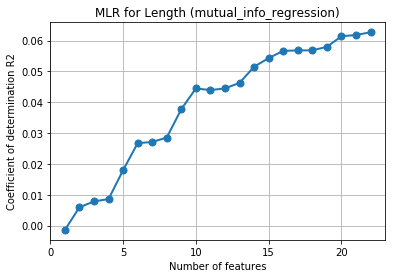

In [11]:
multiple_linear_regression(f_regression, X, y2, 'Length')
multiple_linear_regression(mutual_info_regression, X, y2, 'Length')

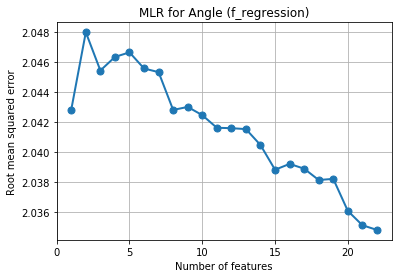

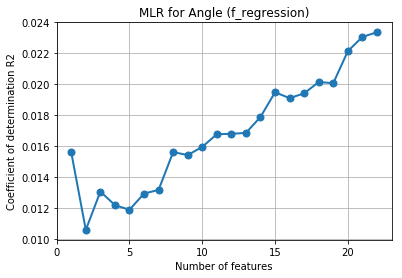

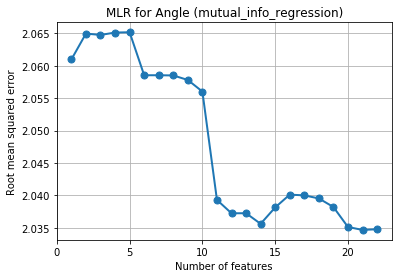

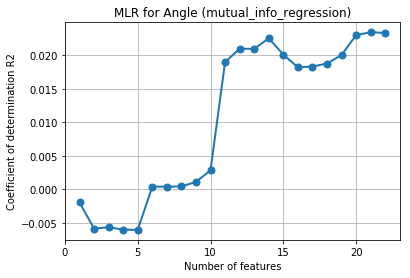

In [12]:
multiple_linear_regression(f_regression, X, y3, 'Angle')
multiple_linear_regression(mutual_info_regression, X, y3, 'Angle')

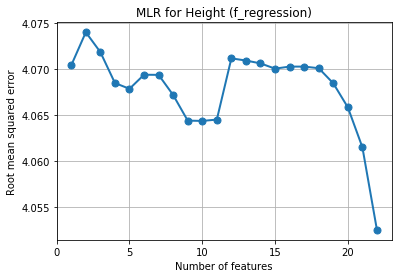

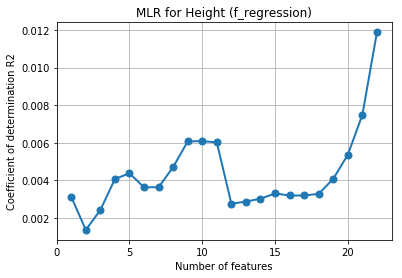

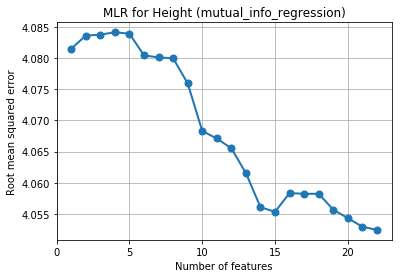

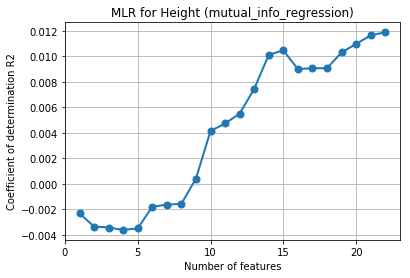

In [13]:
multiple_linear_regression(f_regression, X, y4, 'Height')
multiple_linear_regression(mutual_info_regression, X, y4, 'Height')

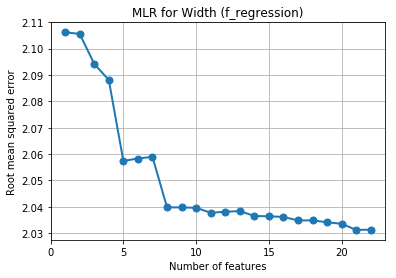

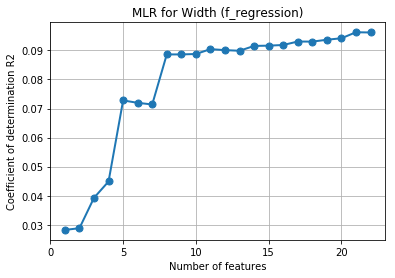

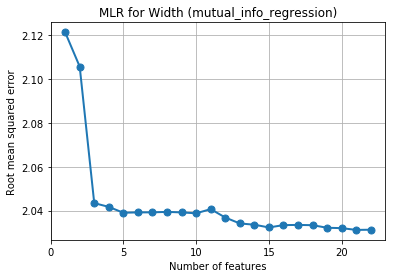

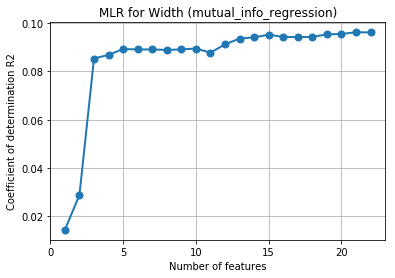

In [14]:
multiple_linear_regression(f_regression, X, y5, 'Width')
multiple_linear_regression(mutual_info_regression, X, y5, 'Width')

## Analysis of above results:
- All features selection metrics are showing that for more than 10 features, there is no improvement either in  rmse or r2_score

In [15]:
# Building the MLR using the 10 best features selected above results 

test = SelectKBest(score_func = f_regression, k = 10).fit(X, y1)
X_new = test.transform(X)

# Standardazing the features selected by above method to 0 mean and unit variance
scaler = StandardScaler()
X_std = scaler.fit_transform(X_new)
        
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y1, test_size = 0.33, random_state = 1)

mlr_y1 = linear_model.LinearRegression()

# training the model with train set
mlr_y1.fit(X_train, y_train)

# testing the MLR with test set
y_pred = mlr_y1.predict(X_test)

# calculating the RMSE for Y1(Cooling load) for test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
R2_score = r2_score(y_test, y_pred)

features = []
for i in range(len(test.get_support())):
    if(test.get_support()[i]):
        features.append(X.columns[test.get_support()[i] + i-1])
print("Selected Features are: " , features)

# Evaluation metrics of the model
print("\nMLR for Part weight(Y1):")
print("\t\t\tRMSE: %.2f" % rmse)
print("\t\t\tR2_Value (Coef. of determination): %.2f" % R2_score)

Selected Features are:  ['Melt temperature', 'Cavity wall temperature', 'Cooling time', 'Injection flow rate', 'Maximum Mold Temp', 'Ejection Temp', 'Specific Heat (Cp) - Constant', 'Solid density', 'Melt density', 'E Constant //']

MLR for Part weight(Y1):
			RMSE: 2.24
			R2_Value (Coef. of determination): 0.91


In [16]:
# Building the MLR using the 10 best features selected above results 


test = SelectKBest(score_func = f_regression, k = 10).fit(X, y2)
X_new = test.transform(X)

# Standardazing the features selected by above method to 0 mean and unit variance
scaler = StandardScaler()
X_std = scaler.fit_transform(X_new)
        
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y2, test_size = 0.33, random_state = 1)

mlr_y2 = linear_model.LinearRegression()

# training the model with train set
mlr_y2.fit(X_train, y_train)

# testing the MLR with test set
y_pred = mlr_y2.predict(X_test)

# calculating the RMSE for Y1(Cooling load) for test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
R2_score = r2_score(y_test, y_pred)

features = []
for i in range(len(test.get_support())):
    if(test.get_support()[i]):
        features.append(X.columns[test.get_support()[i] + i-1])
print("Selected Features are: " , features)

# Evaluation metrics of the model
print("\nMLR for Length(Y2):")
print("\t\t\tRMSE: %.2f" % rmse)
print("\t\t\tR2_Value (Coef. of determination): %.2f" % R2_score)

Selected Features are:  ['Cavity wall temperature', 'Holding pressure time', 'Cooling time', 'No Flow Temp', 'Ejection Temp', 'Specific Heat (Cp) - Constant', 'Thermal Conductivity (Lambda) - Constant', 'P2', 'P3', 'N0 - Nu Polynom //']

MLR for Length(Y2):
			RMSE: 1.79
			R2_Value (Coef. of determination): 0.03


In [17]:
# Building the MLR using the 10 best features selected above results 


test = SelectKBest(score_func = f_regression, k = 10).fit(X, y3)
X_new = test.transform(X)

# Standardazing the features selected by above method to 0 mean and unit variance
scaler = StandardScaler()
X_std = scaler.fit_transform(X_new)
        
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y3, test_size = 0.33, random_state = 1)

mlr_y3 = linear_model.LinearRegression()

# training the model with train set
mlr_y3.fit(X_train, y_train)

# testing the MLR with test set
y_pred = mlr_y3.predict(X_test)

# calculating the RMSE for Y1(Cooling load) for test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
R2_score = r2_score(y_test, y_pred)

features = []
for i in range(len(test.get_support())):
    if(test.get_support()[i]):
        features.append(X.columns[test.get_support()[i] + i-1])
print("Selected Features are: " , features)

# Evaluation metrics of the model
print("\nMLR for Angle(Y3):")
print("\t\t\tRMSE: %.2f" % rmse)
print("\t\t\tR2_Value (Coef. of determination): %.2f" % R2_score)

Selected Features are:  ['Holding pressure time', 'Cooling time', 'Injection flow rate', 'Holding pressure', 'No Flow Temp', 'Thermal Conductivity (Lambda) - Constant', 'Melt density', 'P2', 'P3', 'E Constant //']

MLR for Angle(Y3):
			RMSE: 2.04
			R2_Value (Coef. of determination): 0.02


In [18]:
# Building the MLR using the 10 best features selected above results 


test = SelectKBest(score_func = f_regression, k = 10).fit(X, y4)
X_new = test.transform(X)

# Standardazing the features selected by above method to 0 mean and unit variance
scaler = StandardScaler()
X_std = scaler.fit_transform(X_new)
        
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y4, test_size = 0.33, random_state = 1)

mlr_y4 = linear_model.LinearRegression()

# training the model with train set
mlr_y4.fit(X_train, y_train)

# testing the MLR with test set
y_pred = mlr_y4.predict(X_test)

# calculating the RMSE for Y1(Cooling load) for test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
R2_score = r2_score(y_test, y_pred)

features = []
for i in range(len(test.get_support())):
    if(test.get_support()[i]):
        #features.append("X" + str(test.get_support()[i] + i))
        features.append(X.columns[test.get_support()[i] + i-1])
print("Selected Features are: " , features)

# Evaluation metrics of the model
print("\nMLR for Height(Y4):")
print("\t\t\tRMSE: %.2f" % rmse)
print("\t\t\tR2_Value (Coef. of determination): %.2f" % R2_score)

Selected Features are:  ['Melt temperature', 'Cavity wall temperature', 'Holding pressure time', 'Cooling time', 'Injection flow rate', 'Specific Heat (Cp) - Constant', 'Thermal Conductivity (Lambda) - Constant', 'Load  (MVR)', 'P2', 'E Constant //']

MLR for Height(Y4):
			RMSE: 4.06
			R2_Value (Coef. of determination): 0.01


In [19]:
# Building the MLR using the 10 best features selected above results 


test = SelectKBest(score_func = f_regression, k = 10).fit(X, y5)
X_new = test.transform(X)

# Standardazing the features selected by above method to 0 mean and unit variance
scaler = StandardScaler()
X_std = scaler.fit_transform(X_new)
        
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y5, test_size = 0.33, random_state = 1)

mlr_y5 = linear_model.LinearRegression()

# training the model with train set
mlr_y5.fit(X_train, y_train)

# testing the MLR with test set
y_pred = mlr_y5.predict(X_test)

# calculating the RMSE for Y1(Cooling load) for test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
R2_score = r2_score(y_test, y_pred)

features = []
for i in range(len(test.get_support())):
    if(test.get_support()[i]):
        #features.append("X" + str(test.get_support()[i] + i))
        features.append(X.columns[test.get_support()[i] + i-1])
print("Selected Features are: " , features)

# Evaluation metrics of the model
print("\nMLR for Width(Y5):")
print("\t\t\tRMSE: %.2f" % rmse)
print("\t\t\tR2_Value (Coef. of determination): %.2f" % R2_score)

Selected Features are:  ['Melt temperature', 'Cooling time', 'Injection flow rate', 'Holding pressure', 'No Flow Temp', 'Ejection Temp', 'Thermal diffusivity [K=lambda/(rho*Cp)] ', 'Melt density', 'P3', 'E Constant //']

MLR for Width(Y5):
			RMSE: 2.04
			R2_Value (Coef. of determination): 0.09


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
# rng = np.random.RandomState(1)
# X = np.sort(200 * rng.rand(600, 1) - 100, axis=0)
# y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
# y += (0.5 - rng.rand(*y.shape))

y = df[['Part weight','Length','Angle', 'Height', 'Width']].values
X = df.drop(['Part weight','Length','Angle', 'Height', 'Width'], axis=1).fillna(0).values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)

max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                          max_depth=max_depth,
                                                          random_state=0))
regr_multirf.fit(X_train, y_train)

regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth,
                                random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)

In [21]:
y = df[['Part weight','Length','Angle', 'Height', 'Width']]
X = df.drop(['Part weight','Length','Angle', 'Height', 'Width'], axis=1).fillna(0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)

In [22]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression

y = df[['Part weight','Length','Angle', 'Height', 'Width']]
X = df.drop(['Part weight','Length','Angle', 'Height', 'Width'], axis=1).fillna(0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)

multi_reg = MultiOutputRegressor(LinearRegression())
multi_reg.fit(X_train, y_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


multi_rf_reg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_depth=30))
multi_rf_reg.fit(X_train, y_train)

rf_reg = RandomForestRegressor(n_estimators=100, max_depth=30)
rf_reg.fit(X_train, y_train)

y_multi_reg = multi_reg.predict(X_test)
y_multi_rf_reg = multi_rf_reg.predict(X_test)

et = ExtraTreesRegressor(n_estimators=100, max_depth=30)
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)

multi_et_reg = MultiOutputRegressor(ExtraTreesRegressor(n_estimators=100, max_depth=30))
multi_et_reg.fit(X_train, y_train)

print('Linear Regression:', lin_reg.score(X_test, y_test))
print('RandomForest Regression:', rf_reg.score(X_test, y_test))
print('ExtraTrees Regression:', et.score(X_test, y_test))

print('MultiOutput Linear Regression:', multi_reg.score(X_test, y_test))
print('MultiOutput RandomForest Regression:', multi_rf_reg.score(X_test, y_test))
print('MultiOutput ExtraTrees Regression:', multi_et_reg.score(X_test, y_test))

Linear Regression: 0.9323103811833177
RandomForest Regression: 0.9970206320809948
ExtraTrees Regression: 0.9966470276746457
MultiOutput Linear Regression: 0.22384924742702647
MultiOutput RandomForest Regression: 0.8389360849051662
MultiOutput ExtraTrees Regression: 0.9348357849386005


In [23]:
feature_importances1 = pd.DataFrame(et.feature_importances_,
                                   index = X.columns,
                                   columns=['importance_ET']).sort_values('importance_ET', ascending=False)
feature_importances1 = feature_importances1.reset_index().rename(columns={'index':'feature_ET'})
feature_importances1

,feature_ET,importance_ET
0,Melt density,0.186033
1,Solid density,0.178976
2,Injection flow rate,0.135535
3,E Constant //,0.082181
4,Specific Heat (Cp) - Constant,0.059466
5,Melt Volume Rate (MFR/MFI),0.059009
6,P3,0.043638
7,Ts,0.033901
8,No Flow Temp,0.028550
9,Ejection Temp,0.025353


In [24]:
feature_importances2 = pd.DataFrame(rf_reg.feature_importances_,
                                   index = X.columns,
                                   columns=['importance_RF']).sort_values('importance_RF', ascending=False)
feature_importances2 = feature_importances2.reset_index().rename(columns={'index':'feature_RF'})
feature_importances2

,feature_RF,importance_RF
0,Injection flow rate,0.624370
1,Melt density,0.098855
2,Melt Volume Rate (MFR/MFI),0.071181
3,P1,0.032388
4,Ts,0.026456
5,Thermal diffusivity [K=lambda/(rho*Cp)],0.025188
6,Holding pressure,0.024789
7,P3,0.022874
8,No Flow Temp,0.020356
9,P2,0.012976


[18:37:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[18:37:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[18:37:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[18:37:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[18:37:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[18:37:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[18:37:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[18:37:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[18:37:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[18:37:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[18:37:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[18:37:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[18:37:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[18:37:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

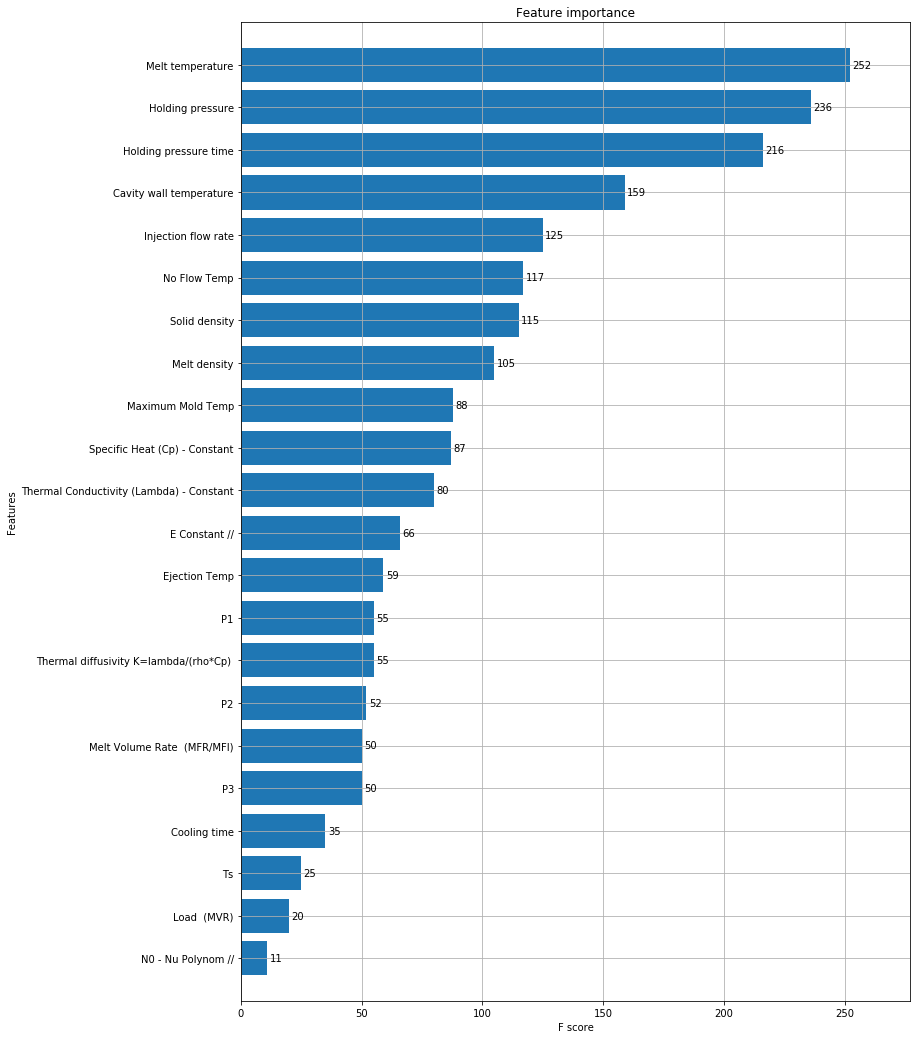

In [25]:
import re
import pandas as pd
import numpy as np
from xgboost.sklearn import XGBRegressor
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

df.columns = [regex.sub("", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]
train_y = df[['Part weight','Length','Angle', 'Height', 'Width']].values
train_X = df.drop(['Part weight','Length','Angle', 'Height', 'Width'], axis=1)

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100, feval=xgb_r2_score, maximize=True)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=22, height=0.8, ax=ax)
plt.show()

In [26]:
feature_importances3= pd.DataFrame(sorted(model.get_score(importance_type='weight').items(), key=lambda d:d[1], reverse = True),columns=['feature_xgb','importance_xgb'])
feature_importances3

,feature_xgb,importance_xgb
0,Melt temperature,252
1,Holding pressure,236
2,Holding pressure time,216
3,Cavity wall temperature,159
4,Injection flow rate,125
5,No Flow Temp,117
6,Solid density,115
7,Melt density,105
8,Maximum Mold Temp,88
9,Specific Heat (Cp) - Constant,87


In [27]:
feature_importances1.join([feature_importances2,feature_importances3],how='outer')

,feature_ET,importance_ET,feature_RF,importance_RF,feature_xgb,importance_xgb
0,Melt density,0.186033,Injection flow rate,0.624370,Melt temperature,252
1,Solid density,0.178976,Melt density,0.098855,Holding pressure,236
2,Injection flow rate,0.135535,Melt Volume Rate (MFR/MFI),0.071181,Holding pressure time,216
3,E Constant //,0.082181,P1,0.032388,Cavity wall temperature,159
4,Specific Heat (Cp) - Constant,0.059466,Ts,0.026456,Injection flow rate,125
5,Melt Volume Rate (MFR/MFI),0.059009,Thermal diffusivity [K=lambda/(rho*Cp)],0.025188,No Flow Temp,117
6,P3,0.043638,Holding pressure,0.024789,Solid density,115
7,Ts,0.033901,P3,0.022874,Melt density,105
8,No Flow Temp,0.028550,No Flow Temp,0.020356,Maximum Mold Temp,88
9,Ejection Temp,0.025353,P2,0.012976,Specific Heat (Cp) - Constant,87


In [28]:
#plt.matshow(df_train.corr())
corr = df.corr()
corr.style.background_gradient()

,Part weight,Length,Angle,Height,Width,Melt temperature,Cavity wall temperature,Holding pressure time,Cooling time,Injection flow rate,Holding pressure,Maximum Mold Temp,No Flow Temp,Ejection Temp,Specific Heat (Cp) - Constant,Thermal Conductivity (Lambda) - Constant,Thermal diffusivity K=lambda/(rho*Cp),Solid density,Melt density,Load (MVR),Melt Volume Rate (MFR/MFI),P1,P2,P3,Ts,E Constant //,N0 - Nu Polynom //
Part weight,1,0.085054,0.1113,0.00408048,0.121401,0.529574,0.621344,-0.289409,-0.436783,-0.753009,0.283961,0.66105,0.386075,0.525023,-0.714593,0.353814,0.282219,0.974059,0.977491,0.475795,0.194176,-0.227882,0.0927063,0.336523,0.136695,0.821508,-0.356096
Length,0.085054,1,0.883761,0.947559,-0.74209,0.0138189,0.0838994,0.150147,0.137663,-0.0244827,-0.00292557,0.112144,-0.185882,-0.116269,-0.11668,-0.145737,-0.0793149,0.0131616,0.0567587,-0.0891469,0.00884916,0.0125322,0.128937,0.159204,0.012056,-0.013998,-0.143927
Angle,0.1113,0.883761,1,0.955955,-0.858067,0.0133304,0.00180696,-0.0693143,-0.116087,-0.0514211,0.168836,0.00158205,0.0643665,0.0543089,-0.000357911,0.118723,0.048224,0.0873135,0.0818761,0.0749312,0.0149987,0.0176066,0.0590282,0.00898245,0.0263011,0.07083,0.0150176
Height,0.00408048,0.947559,0.955955,1,-0.908043,0.0237637,0.0236781,0.0674018,0.0695247,0.0289981,0.00272549,0.0350703,-0.0210375,-0.0170169,-0.0311845,-0.035484,0.0127268,-0.0263971,-0.0175256,-0.0485315,0.0100582,0.024287,0.0501874,0.0298968,0.0136721,-0.0545477,-0.0133868
Width,0.121401,-0.74209,-0.858067,-0.908043,1,-0.0934997,-0.0125096,-0.0755733,-0.0900298,-0.0831255,0.112271,0.00172366,-0.214166,-0.126656,-0.0143495,-0.0530939,-0.155422,0.0947913,0.127662,0.0557974,0.00324661,-0.0316677,0.0736575,0.163747,-0.0298556,0.130816,-0.135951
Melt temperature,0.529574,0.0138189,0.0133304,0.0237637,-0.0934997,1,0.836938,0.147476,0.0653002,-0.45034,-0.248671,0.866914,0.645104,0.692424,-0.660067,0.273904,0.522669,0.550364,0.555159,0.218195,0.30004,0.0354166,-0.298658,-0.0224851,0.276409,0.433346,-0.128852
Cavity wall temperature,0.621344,0.0838994,0.00180696,0.0236781,-0.0125096,0.836938,1,0.204092,0.116092,-0.504264,-0.254748,0.935108,0.452739,0.559551,-0.771182,0.130504,0.401317,0.611575,0.647361,0.122015,0.269981,0.0103026,-0.15445,0.0978832,0.269073,0.466708,-0.239725
Holding pressure time,-0.289409,0.150147,-0.0693143,0.0674018,-0.0755733,0.147476,0.204092,1,0.681989,0.185683,-0.506542,0.183091,-0.167397,-0.140619,-0.191658,-0.385359,0.0704893,-0.32151,-0.322507,-0.650125,-0.107119,0.105538,-0.161446,-0.11526,0.0501792,-0.420059,-0.0419104
Cooling time,-0.436783,0.137663,-0.116087,0.0695247,-0.0900298,0.0653002,0.116092,0.681989,1,0.298182,-0.532875,0.0903051,-0.255085,-0.244259,-0.0651772,-0.438207,-0.00156735,-0.466228,-0.452735,-0.676057,-0.109985,0.139406,-0.143281,-0.11362,0.0439856,-0.521303,0.00314799
Injection flow rate,-0.753009,-0.0244827,-0.0514211,0.0289981,-0.0831255,-0.45034,-0.504264,0.185683,0.298182,1,-0.0730534,-0.517295,-0.360649,-0.448654,0.556652,-0.262328,-0.207689,-0.74228,-0.743662,-0.36403,-0.078389,0.192556,-0.0794239,-0.0982888,-0.0706852,-0.681095,0.271088


# PCA

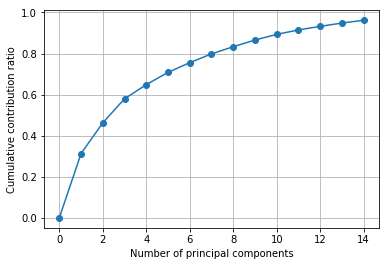

In [29]:
from sklearn.decomposition import PCA #主成分分析器
train_y = df[['Part weight','Length','Angle', 'Height', 'Width']].values
train_X = df.drop(['Part weight','Length','Angle', 'Height', 'Width'], axis=1).fillna(0)
dfs = train_X.apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)
pca = PCA(n_components = 0.95)
pca.fit(dfs.fillna(0))
feature = pca.transform(dfs.fillna(0))
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list(np.cumsum(pca.explained_variance_ratio_)), '-o')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative contribution ratio')
plt.grid()
plt.show()

In [30]:
n_components=14
df_principal = pd.DataFrame(data=feature, columns = ['pc' + str(i+1) for i in range(n_components)])
df_principal.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14
0,-1.039156,1.798900,0.702280,-0.350414,0.297299,-0.455126,-0.301970,-0.145521,0.556092,-0.467280,-1.014032,0.107132,0.305093,-0.100971
1,-1.146162,1.889635,0.738326,-0.290403,0.297675,-0.417497,-0.302765,-0.116676,0.509577,-0.501879,-0.974878,0.167365,0.203843,-0.125975
2,-1.173155,1.924190,0.775209,-0.347627,0.327699,-0.426575,-0.246416,-0.149509,0.581596,-0.455239,-0.969278,0.126108,0.160549,-0.111553
3,-1.280162,2.014925,0.811255,-0.287616,0.328075,-0.388946,-0.247211,-0.120664,0.535081,-0.489838,-0.930124,0.186341,0.059298,-0.136557
4,-0.982941,2.458526,0.403492,-0.588037,0.640751,-0.649916,-0.382632,-0.262410,0.781161,-0.311089,-0.342064,0.215385,0.857011,-1.104037


In [31]:
np.sum(np.var(df_principal).values)

21.163030808128145

In [32]:
np.var(df_principal).values

array([6.88872345, 3.2899127 , 2.57260259, 1.51725571, 1.31181582,
       1.04363523, 0.93602428, 0.76789521, 0.71363935, 0.60859068,
       0.47517093, 0.38350082, 0.35274877, 0.30151526])

In [33]:
# How much of the variance do these components explain?
np.cumsum(pca.explained_variance_ratio_)

array([0.31319158, 0.46276545, 0.57972724, 0.64870834, 0.70834924,
       0.75579748, 0.79835325, 0.83326513, 0.86571031, 0.89337951,
       0.91498286, 0.93241849, 0.948456  , 0.96216421])

Feature Selection with <b>VarianceThreshold</b>. VarianceThreshold is a useful tool to removing features with a threshold variance. It is a simple and basic Feature Selection.

Instantiate <b>VarianceThreshold</b> as a variable called <b>sel</b> VarianceThreshold removes all zero-variance features by default. These features are any constant value features.

We can change the threshold by adding <b>threshold='threshold value'</b> inside the brackets during the instantiation of <b>VarianceThreshold</b>. Where <b>'threshold value'</b> is equal to p(1-p)
Where <b>'p'</b> is your threshold % in <b>decimal format</b>.

So, for example if I wanted a threshold of <b>60%</b>, I would equate <b>threshold=0.6 * (1 - 0.6)</b>

Now let's instantiate another <b>VarianceThreshold</b> but with a threshold of <b>60%</b>. We'll called it <b>sel60</b>.

In [34]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.6 * (1 - .6)))
sel.fit_transform(train_X).shape

(4620, 17)

In [35]:
VarianceThreshold(threshold=(.6 * (1 - .6)))

VarianceThreshold(threshold=0.24)

In [36]:
sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
sel.fit_transform(train_X).shape

(4620, 18)

In [37]:
VarianceThreshold(threshold=(.9 * (1 - .9)))

VarianceThreshold(threshold=0.08999999999999998)